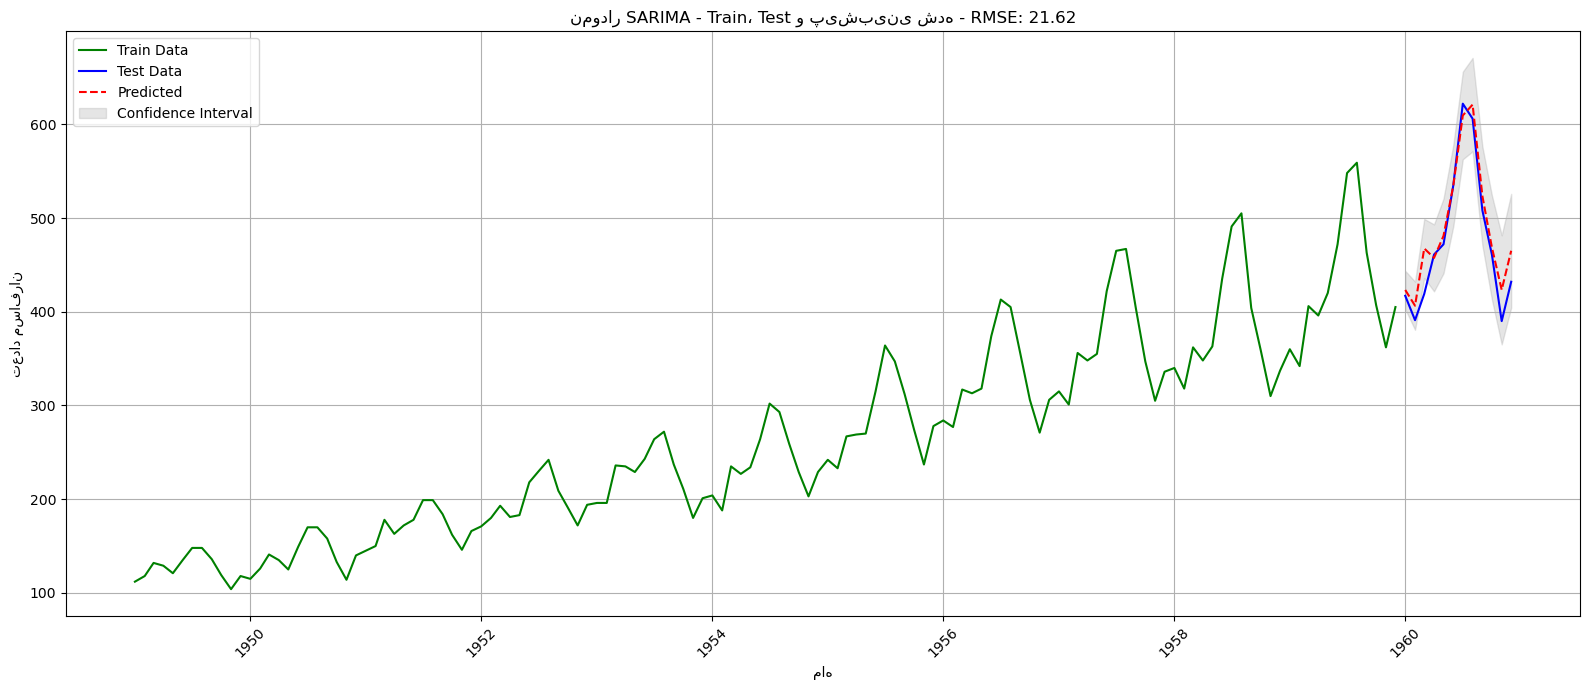

✅ RMSE: 21.62


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# 1️⃣ بارگذاری دیتا
df = pd.read_csv('AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# ✅ تعیین فرکانس دستی - مهم برای جلوگیری از warning
df = df.asfreq('MS')  # داده ماهانه اول ماه (می‌تونی اگر آخر ماه هست، بنویس 'M')

# 2️⃣ تقسیم به train/test (قبل از 1960 و سال 1960)
train = df[df.index < '1960-01-01']
test = df[df.index >= '1960-01-01']

# 3️⃣ ساخت مدل SARIMA با فصلیت سالانه
model = SARIMAX(train['AirPassengers'],
                order=(1, 1, 1),             # Non-seasonal (p,d,q)
                seasonal_order=(1, 1, 1, 12), # Seasonal (P,D,Q,m)
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False)

# 4️⃣ پیش‌بینی
forecast = results.get_forecast(steps=len(test))
pred_ci = forecast.conf_int()
predictions = forecast.predicted_mean  # ⚠️ اینجا تغییر کرد: predicted_mean بجای predict()

# 5️⃣ محاسبه RMSE
rmse = np.sqrt(mean_squared_error(test['AirPassengers'], predictions))

# 6️⃣ رسم نمودار مقایسه‌ای (Train + Test + Predicted)
plt.figure(figsize=(16, 7))

# Train Data
plt.plot(train.index, train, label='Train Data', color='green')

# Test Data
plt.plot(test.index, test, label='Test Data', color='blue')

# Predicted
plt.plot(test.index, predictions, label='Predicted', color='red', linestyle='--')

# Confidence Interval
plt.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='gray', alpha=0.2,
                 label='Confidence Interval')

# تنظیمات نمودار
plt.title(f'نمودار SARIMA - Train، Test و پیش‌بینی شده - RMSE: {rmse:.2f}')
plt.xlabel('ماه')
plt.ylabel('تعداد مسافران')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"✅ RMSE: {rmse:.2f}")